![title](https://avatars.githubusercontent.com/u/79634578?s=200&v=4)

# Algerian Forest Fire Dataset - Temperature Prediction



* Data Collection
* Exploratory data analysis
* Data Cleaning
* Linear Regression Model Training
* Ridge Regression Model Training
* Lasso Regression Model Training
* Elastincet Regression Model Training



# Importing the Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Reading and Cleaning

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Drop an  row

In [3]:

df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)


In [4]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

### Stripping the names of the columns 

In [5]:

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Dropping the Classes Features 

In [6]:
df.drop('Classes',axis=1,inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia


# Replacing the day,month,year feature with date feature

In [7]:
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)


In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,bejaia,2012-06-05


### Checking the datatypes of features 

In [9]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
region                 object
date           datetime64[ns]
dtype: object

### Changing the datatypes of features 

In [10]:


df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)



In [11]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
region                 object
date           datetime64[ns]
dtype: object

### Applying  Label encoding in DC,FWI,region features 

In [12]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [13]:
df['DC']=LabelEncoder.fit_transform(df['DC'])
df['FWI']=LabelEncoder.fit_transform(df['FWI'])
df['region']=LabelEncoder.fit_transform(df['region'])



In [14]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int32
ISI                   float64
BUI                   float64
FWI                     int32
region                  int32
date           datetime64[ns]
dtype: object

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,date
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,2012-06-05


### Checking the null values 

In [16]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
date           0
dtype: int64

### Observation

Zero null value in the dataset 

## Univariate Analysis 

In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [18]:
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'date']

### Features Information

*Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

*Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

*RH : Relative Humidity in %: 21 to 90

*Ws :Wind speed in km/h: 6 to 29

*Rain: total day in mm: 0 to 16.8 FWI Components

*Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

*Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

*Drought Code (DC) index from the FWI system: 7 to 220.4

*Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

*Buildup Index (BUI) index from the FWI system: 1.1 to 68

*Fire Weather Index (FWI) Index: 0 to 31.1


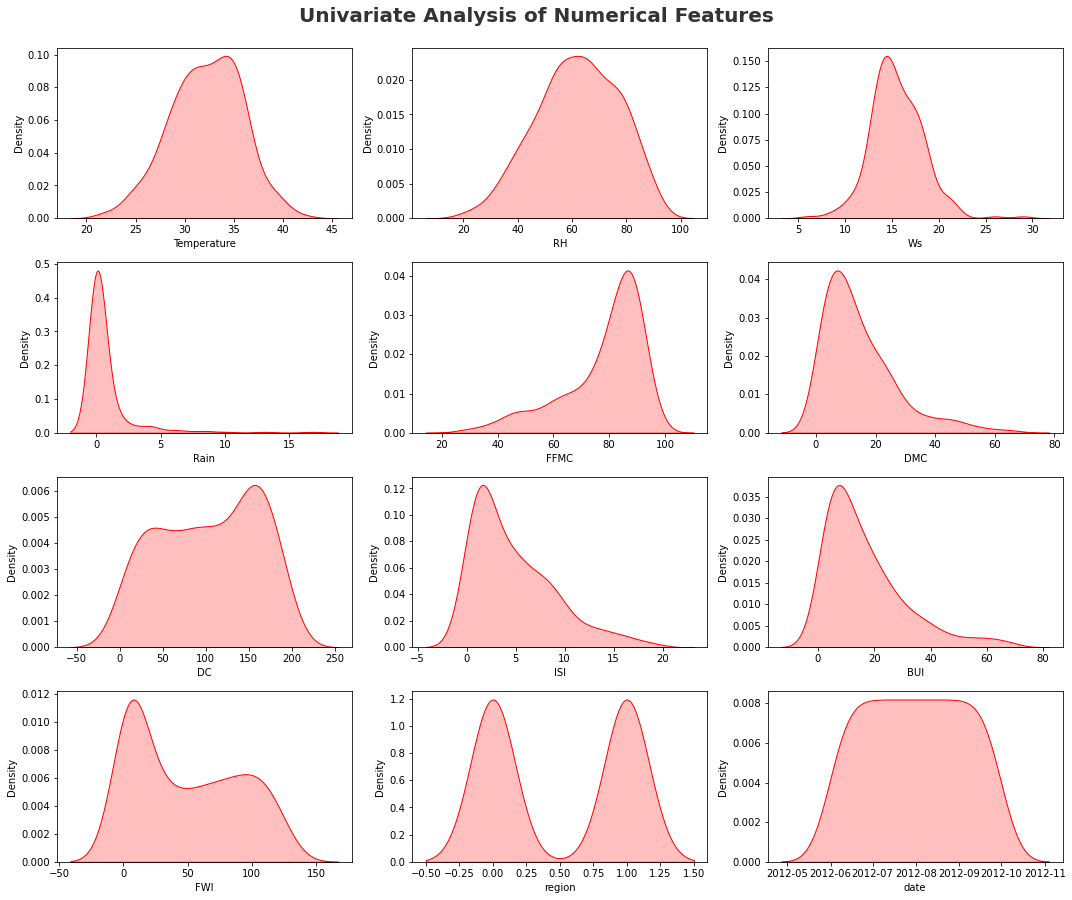

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Visualization of Target Feature 

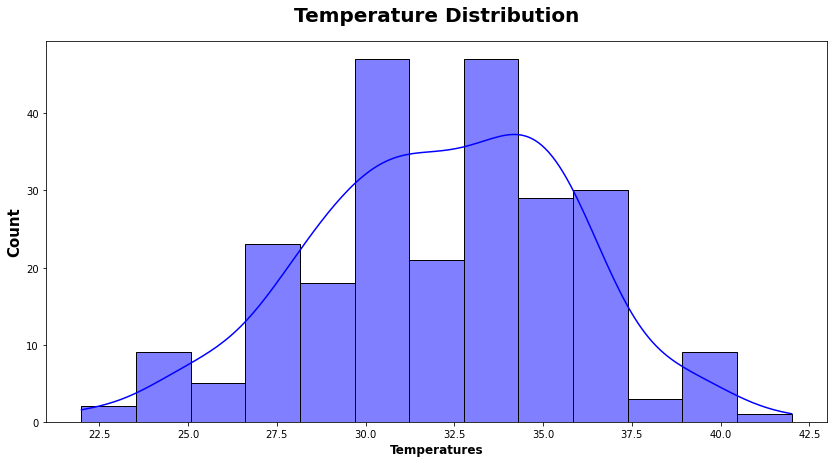

In [20]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

### Observation

Temperature occur most of the time in range 32.5 to 35.0

### Temperature Vs Rain 

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

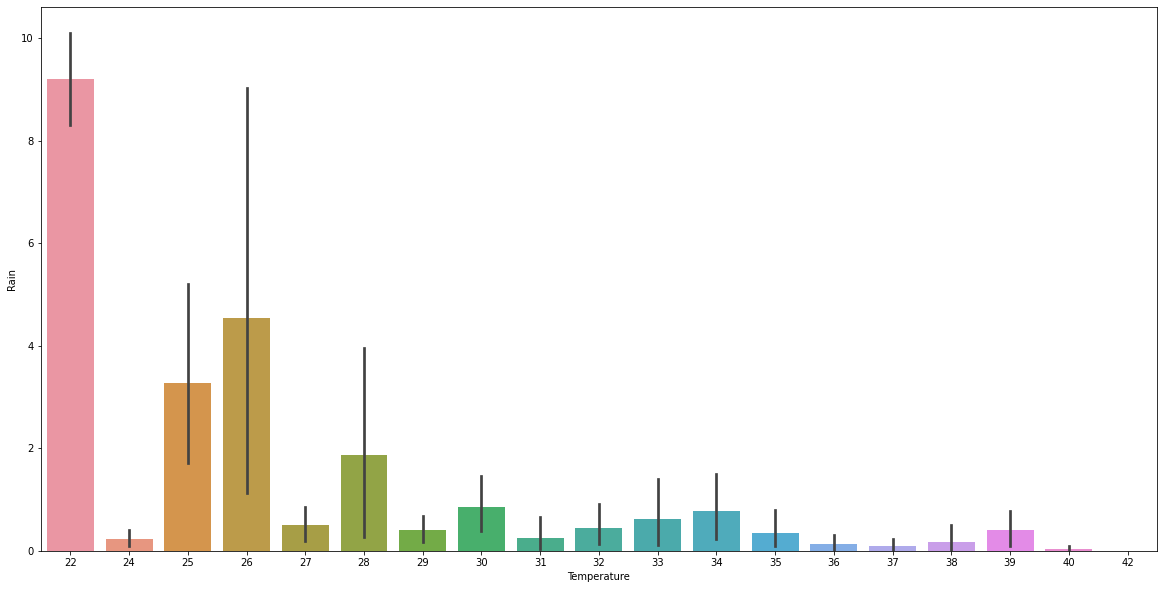

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Rain",data=df)

### Observation

When the temperature is around 22 , most of the time rain occurr

### Which region has most temperature? 

<AxesSubplot:xlabel='region', ylabel='Temperature'>

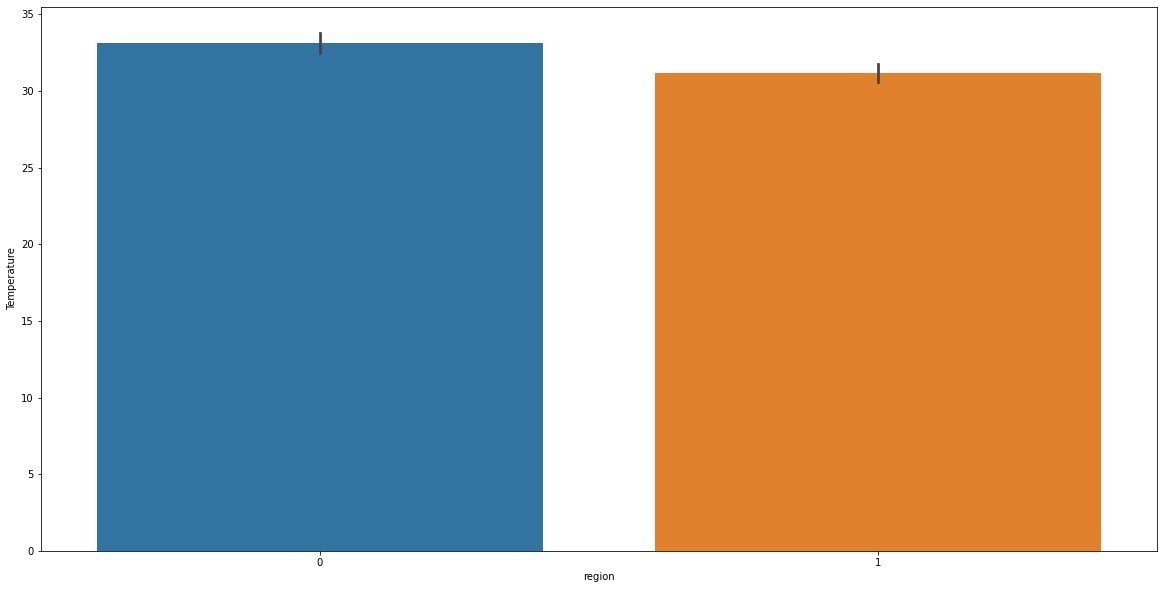

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Temperature",data=df)

### Observation 

Region represented by 0 i.e. 'Sidi-Bel Abbes' has highest temperature

### Correlation of the features 

In [23]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,-0.165840,0.607551,0.455504,0.380581,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,0.041651,-0.690637,-0.348587,-0.295093,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.040958,0.015248,0.029756,-0.081447,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,0.324748,-0.347105,-0.299171,-0.340412,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,-0.319086,0.739730,0.589652,0.617445,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,-0.200609,0.674499,0.982073,0.384628,-0.191094
DC,-0.165840,0.041651,0.040958,0.324748,-0.319086,-0.200609,1.000000,-0.152717,-0.226445,-0.118684,0.016293
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,-0.152717,1.000000,0.635891,0.412512,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,-0.226445,0.635891,1.000000,0.375234,-0.087370
FWI,0.380581,-0.295093,-0.081447,-0.340412,0.617445,0.384628,-0.118684,0.412512,0.375234,1.000000,-0.108099


## Multivariate analysis 

<AxesSubplot:>

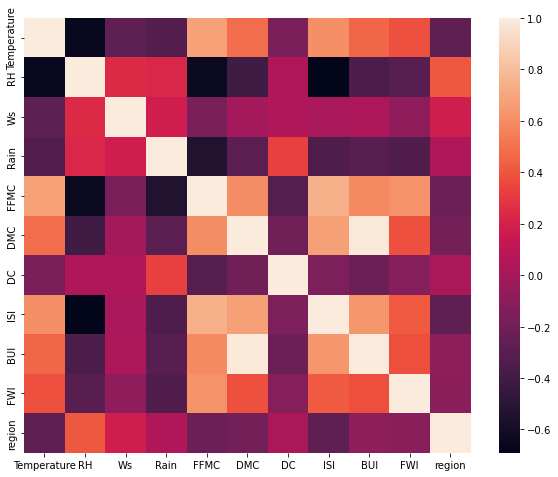

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

### Observation

The target feature Temperature is highly positively correlated with FFMC,ISI

### Temperature Vs date feature 

<AxesSubplot:xlabel='Temperature', ylabel='date'>

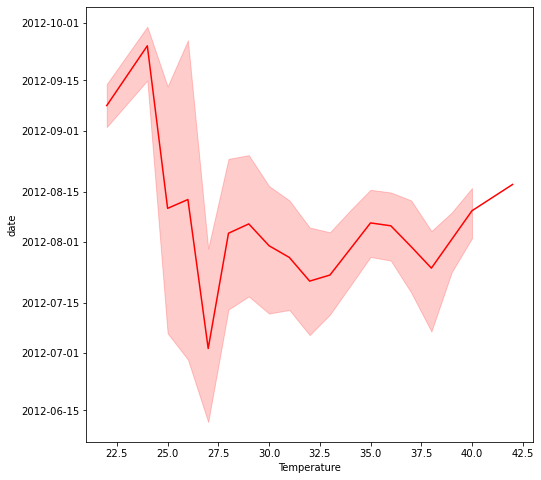

In [25]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Temperature',y='date',data=df,color='r')

### Temperature Vs FFMC 

<Figure size 720x720 with 0 Axes>

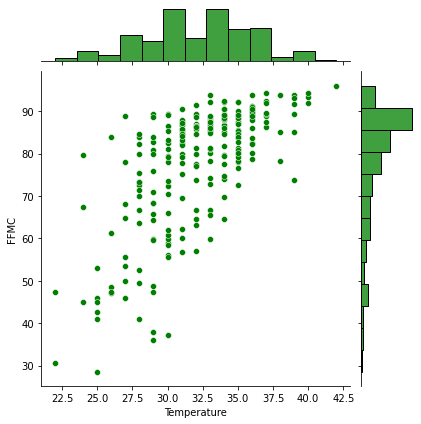

In [26]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Temperature',y='FFMC',data=df,color='g')

### Temperature Vs ISI 

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

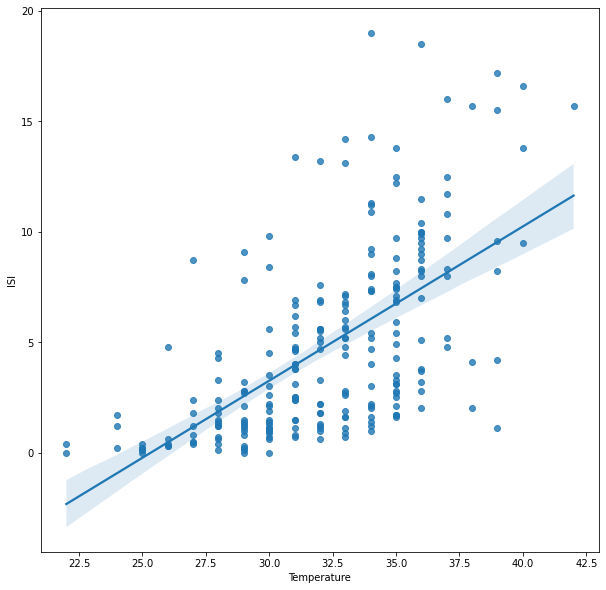

In [27]:
plt.figure(figsize=(10,10))
sns.regplot(x='Temperature',y='ISI',data=df)

### Checking the outliers of the target 'Temperature' feature 

<AxesSubplot:xlabel='Temperature'>

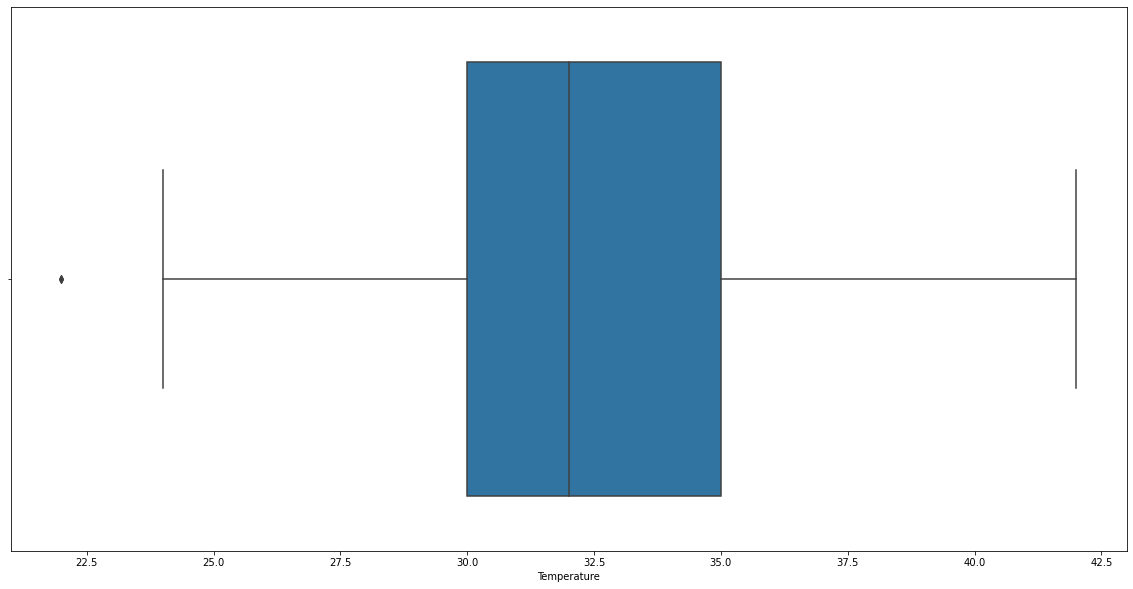

In [28]:
sns.boxplot(df['Temperature'])

### Boxplot of Rain Vs Temperature 

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

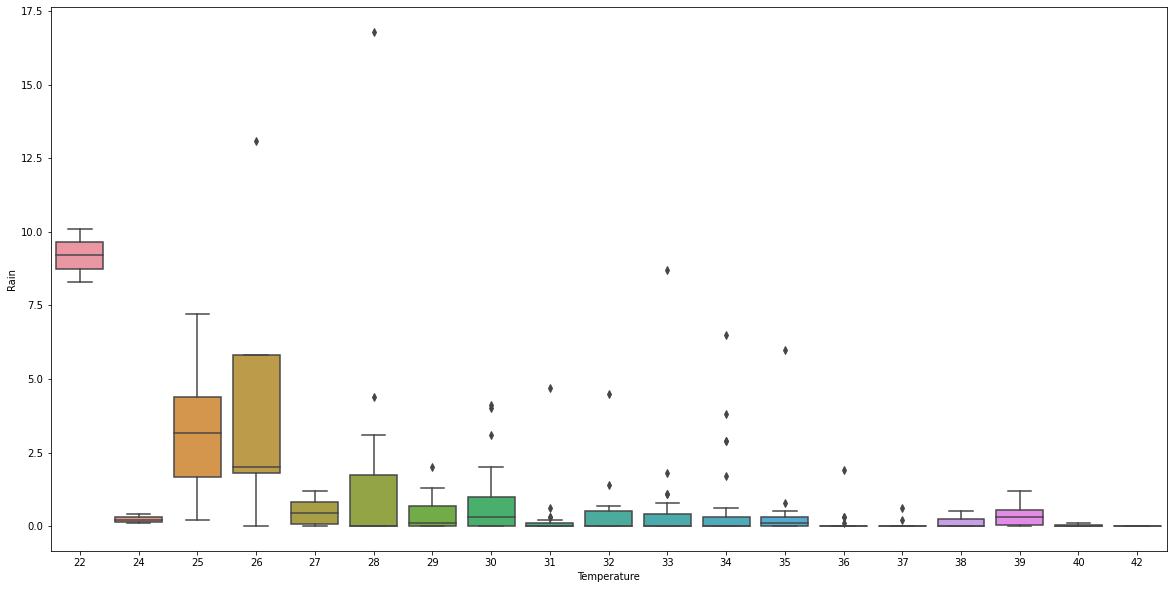

In [29]:
sns.boxplot(x ='Temperature', y ='Rain', data = df)

### Boxplot of 'FFMC' Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

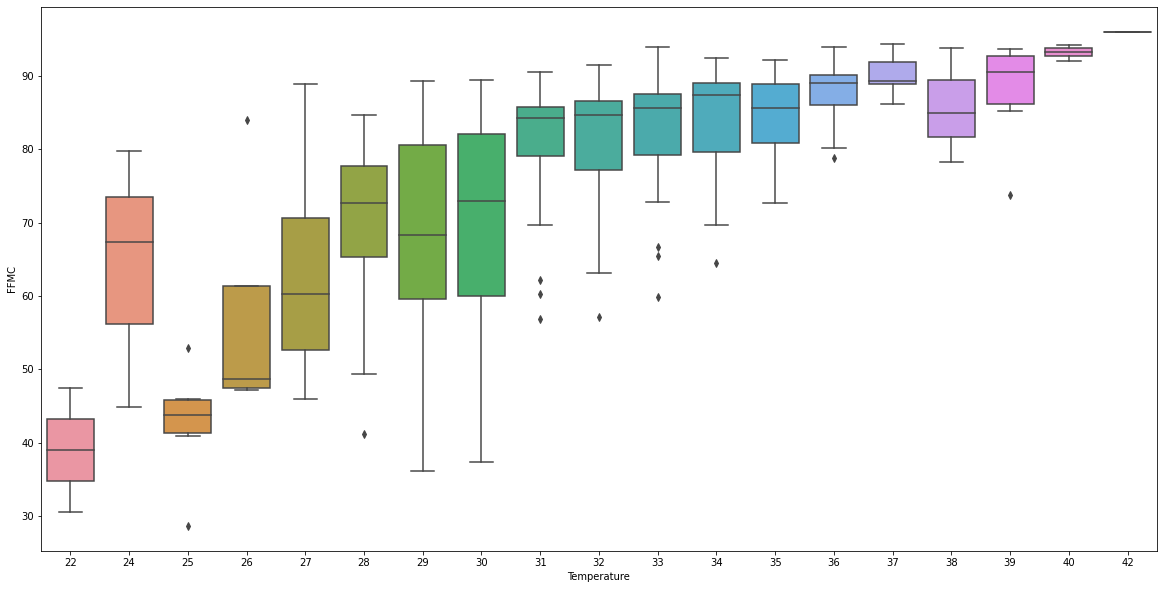

In [30]:
sns.boxplot(x ='Temperature', y ='FFMC', data = df)

### Boxplot of ISI Vs Temperature 

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

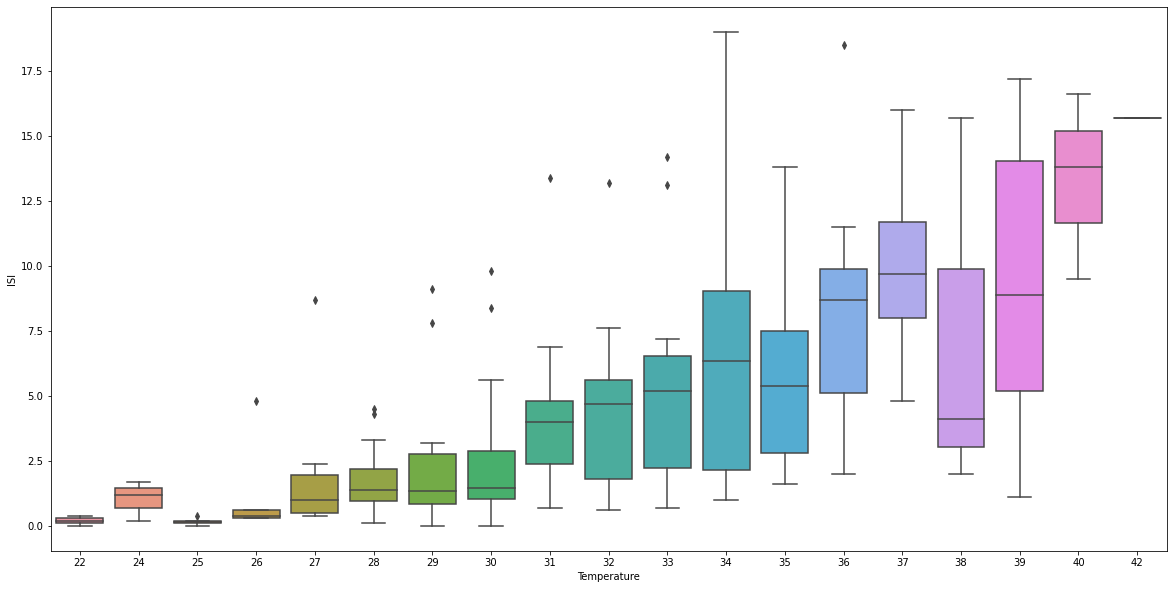

In [31]:
sns.boxplot(x ='Temperature', y ='ISI', data = df)

### Boxplot of region Vs Temperature 

<AxesSubplot:xlabel='region', ylabel='Temperature'>

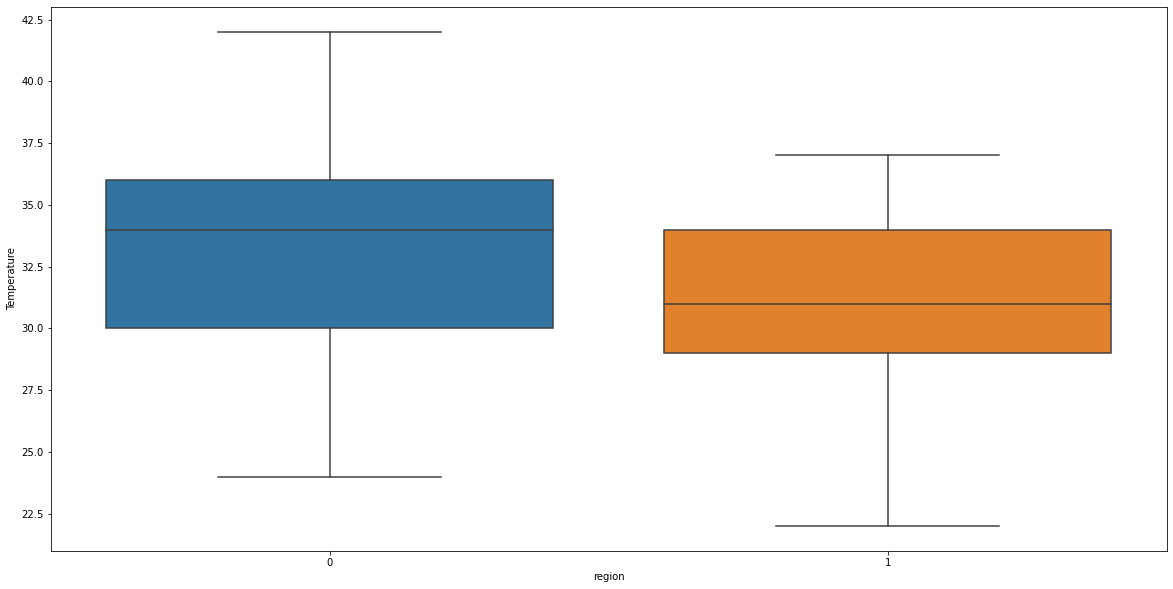

In [32]:
sns.boxplot(x ='region', y ='Temperature', data = df)

### Boxplot of BUI Vs Temperature 

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

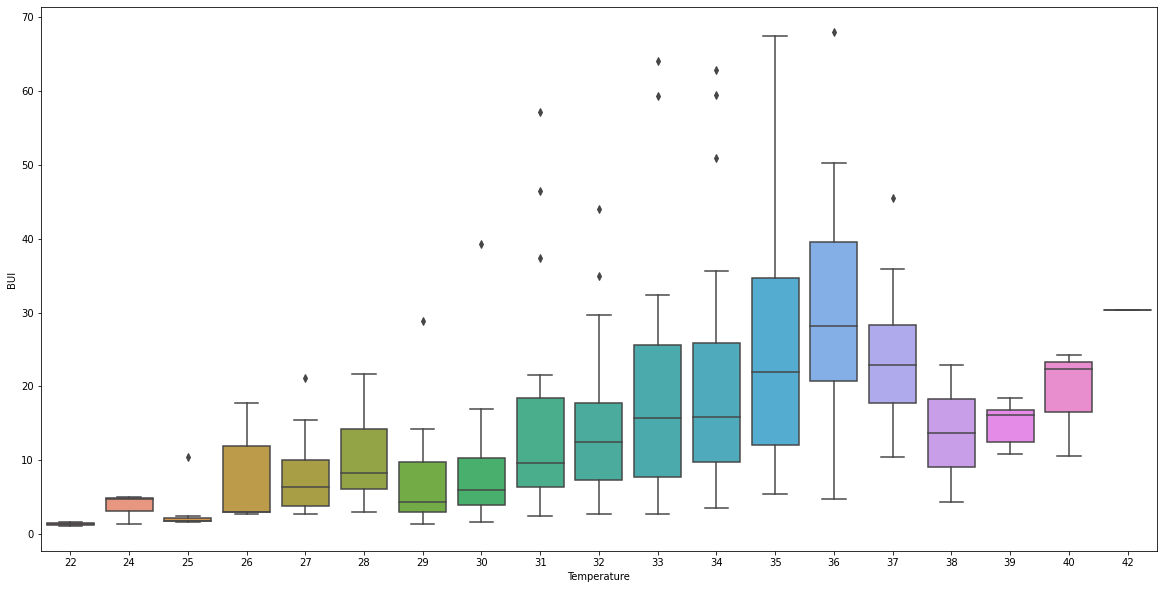

In [33]:
sns.boxplot(x ='Temperature', y ='BUI', data = df)

### Boxplot DMC Vs Temperature 

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

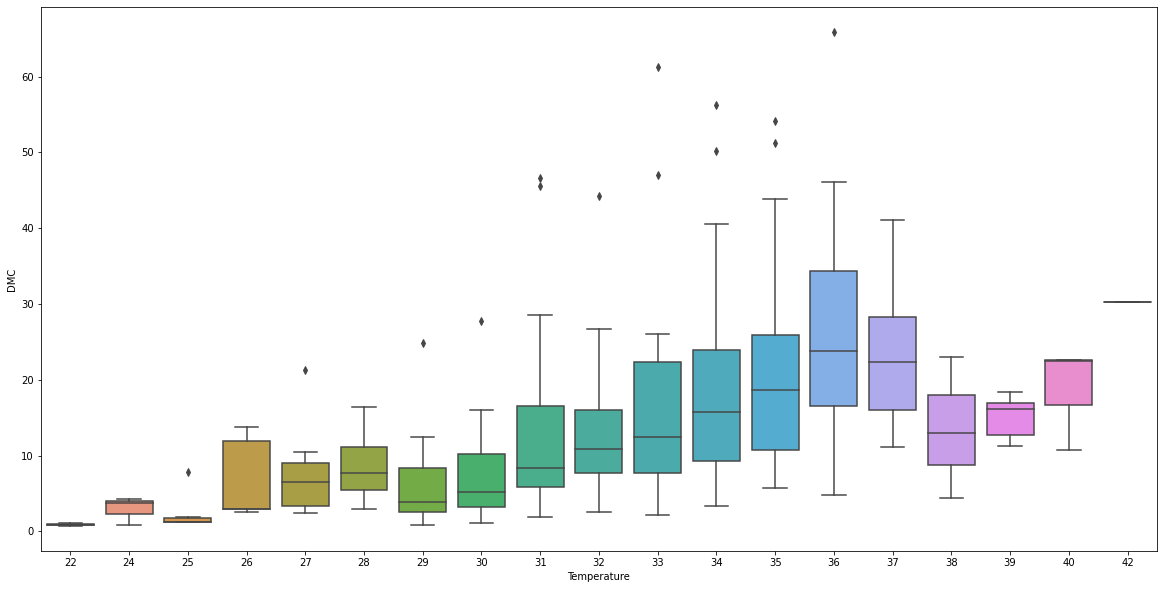

In [34]:
sns.boxplot(x ='Temperature', y ='DMC', data = df)

### Creating Dependent and Independent features 

In [35]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region', 'date'],
      dtype='object')

In [36]:
## Independent Features

x=pd.DataFrame(df, columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])  

## Dependent Features

y=pd.DataFrame(df,columns=['Temperature'])

### Independent Features 

In [37]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1
1,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1
2,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1
3,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1
4,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,112,4.5,16.9,106,0
240,87,15,4.4,41.1,6.5,164,0.1,6.2,0,0
241,87,29,0.5,45.9,3.5,153,0.4,3.4,2,0
242,54,18,0.1,79.7,4.3,25,1.7,5.1,7,0


### Dependent Features 

In [38]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


# TrainTest Split

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=10)

In [40]:
x_train.shape

(163, 10)

In [41]:
x_test.shape

(81, 10)

In [42]:
y_train.shape

(163, 1)

In [43]:
y_test.shape

(81, 1)

#### Independent training dataset 

In [44]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
237,49,6,2.0,61.3,11.9,77,0.6,11.9,4,0
78,54,18,0.0,89.4,20.0,8,9.7,27.5,47,1
25,64,18,0.0,86.8,17.8,157,6.7,21.6,20,1
124,80,14,2.0,48.7,2.2,150,0.3,2.6,1,0
176,64,9,1.2,73.8,11.7,28,1.1,11.4,7,0
...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,53,4.0,8.2,86,1
15,89,13,0.7,36.1,1.7,150,0.0,2.2,0,1
228,51,13,0.0,88.7,16.0,122,6.9,17.8,124,0
125,64,14,0.0,79.4,5.2,26,2.2,5.6,10,0


#### Independent Test Dataset 

In [45]:
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
162,56,15,2.9,74.8,7.1,185,1.6,6.8,8,0
60,64,17,0.0,87.2,31.9,22,6.8,41.2,45,1
61,45,14,0.0,78.8,4.8,1,2.0,4.7,9,1
63,63,14,0.3,76.6,5.7,0,1.7,5.5,8,1
69,59,17,0.0,87.4,14.8,132,6.9,17.9,125,1
...,...,...,...,...,...,...,...,...,...,...
169,68,15,0.0,86.1,23.9,123,5.2,23.9,120,0
232,41,8,0.1,83.9,24.9,177,2.7,28.9,99,0
144,59,16,0.8,74.2,7.0,166,1.6,6.7,8,0
208,37,16,0.0,92.2,61.3,38,13.1,64.0,89,0


#### Dependent Training Dataset 

In [46]:
y_train

,Temperature
237,26
78,36
25,31
124,29
176,39
...,...
64,34
15,29
228,32
125,30


#### Dependent Test Dataset 

In [47]:
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
...,...
169,33
232,29
144,33
208,33


### Standardizing or Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [49]:
scaler

StandardScaler()

In [50]:
x_train=scaler.fit_transform(x_train)

In [51]:
x_test=scaler.transform(x_test)

In [52]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32535487,
        -1.03738328, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76565444,
        -0.01141751,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35302912,
        -0.65562857,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08727045,
         1.825777  , -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76595478,
        -0.89422526, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27639932,
        -0.91808493,  1.01857744]])

In [53]:
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01,  1.41938909e+00,
        -7.33442383e-01, -6.82030988e-01, -9.41944600e-01,
        -9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00, -1.44016117e+00,
         4.94418103e-01,  1.72378441e+00, -5.91368483e-02,
         1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -1.80856948e+00,
        -6.38991577e-01, -8.28897625e-01, -9.18084931e-01,
         1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -1.82611273e+00,
        -7.09829682e-01, -7.72948430e-01, -9.41944600e-01,
         1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  4.89596678e-01,
         5.18030804e-01,  9.42640966e-02,  1.84963667e+00,
         1.

### Model Training 

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
regression=LinearRegression()

In [56]:
regression
regression.fit(x_train,y_train)

LinearRegression()

#### Coefficient 

In [57]:
print(regression.coef_)

[[-1.27500995 -0.53842199 -0.21205266  0.70886534 -1.02729123 -0.32455869
   0.2501139   1.35400654  0.21687466 -0.23115864]]


#### Intercept 

In [58]:
print(regression.intercept_)

[32.17791411]


### Precdiction for Test Data 

In [59]:
reg_pred=regression.predict(x_test)
reg_pred

array([[31.35728286],
       [33.48448971],
       [33.68885621],
       [32.00434093],
       [32.90791395],
       [35.12184072],
       [32.88392257],
       [34.41877632],
       [31.94627835],
       [32.98721461],
       [33.30675698],
       [27.36975802],
       [35.07784211],
       [29.24028529],
       [31.85823402],
       [32.41802576],
       [34.37535576],
       [28.09756027],
       [36.26505018],
       [34.01992072],
       [32.55507349],
       [34.37404142],
       [32.95376928],
       [33.26908507],
       [36.11652279],
       [29.43281151],
       [31.64047533],
       [32.38849979],
       [27.56606986],
       [32.22728534],
       [25.99441341],
       [27.23155419],
       [34.06867619],
       [31.64327002],
       [32.76692249],
       [31.05185077],
       [29.01675218],
       [33.06175783],
       [27.69372403],
       [35.63560078],
       [32.8693709 ],
       [33.63210892],
       [34.17783984],
       [31.5433198 ],
       [36.08261913],
       [33

<AxesSubplot:ylabel='Density'>

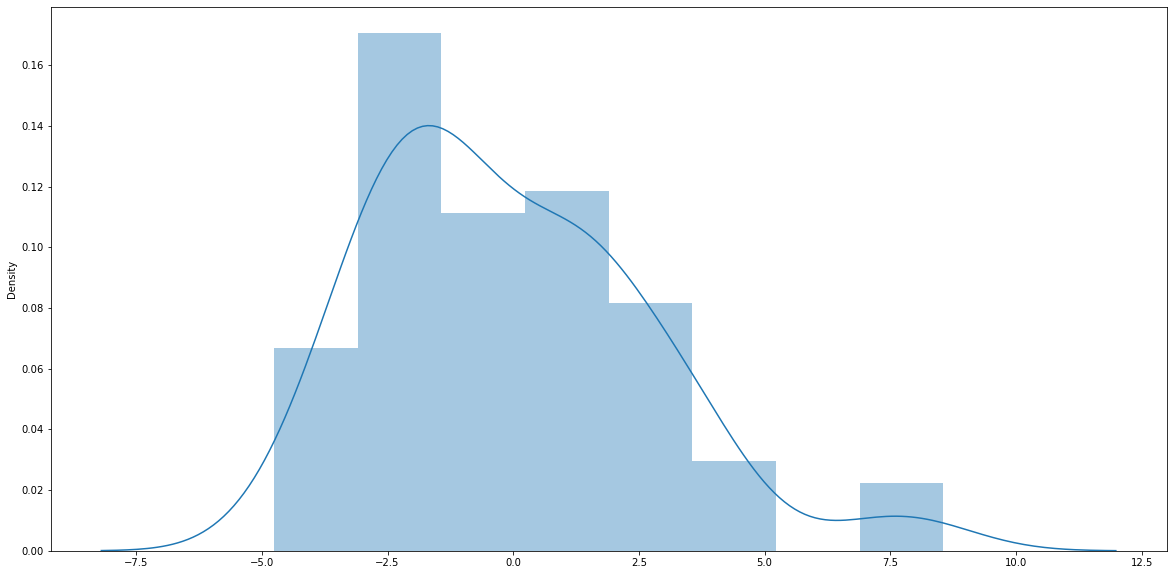

In [60]:
import seaborn as sns
sns.distplot(reg_pred-y_test)

# Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

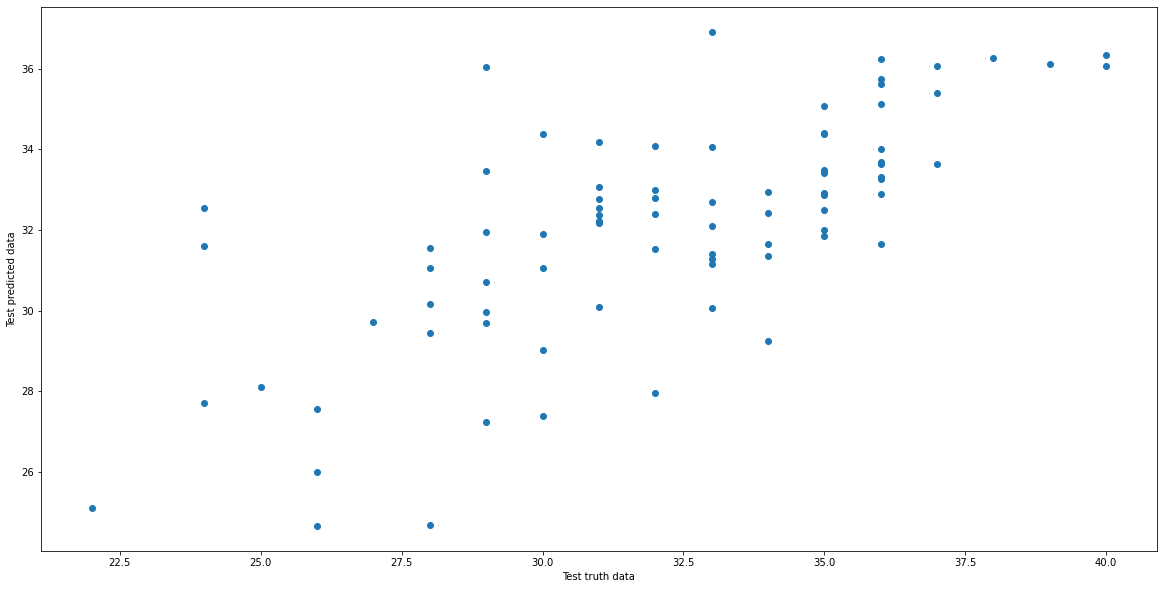

In [61]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

### Residuals 

In [62]:
residual=y_test-reg_pred

In [63]:
residual

,Temperature
162,2.642717
60,1.515510
61,2.311144
63,2.995659
69,2.092086
...,...
169,0.315380
232,-7.042611
144,1.717902
208,-3.918630


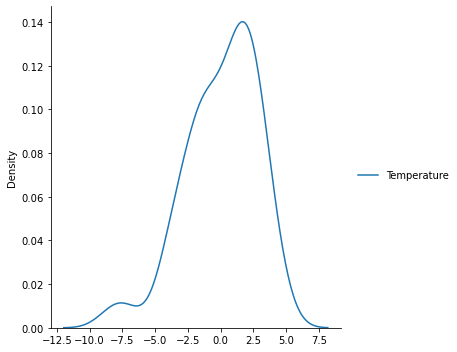

In [64]:
sns.displot(residual,kind='kde')

### Scatterplot with prediction and residual 

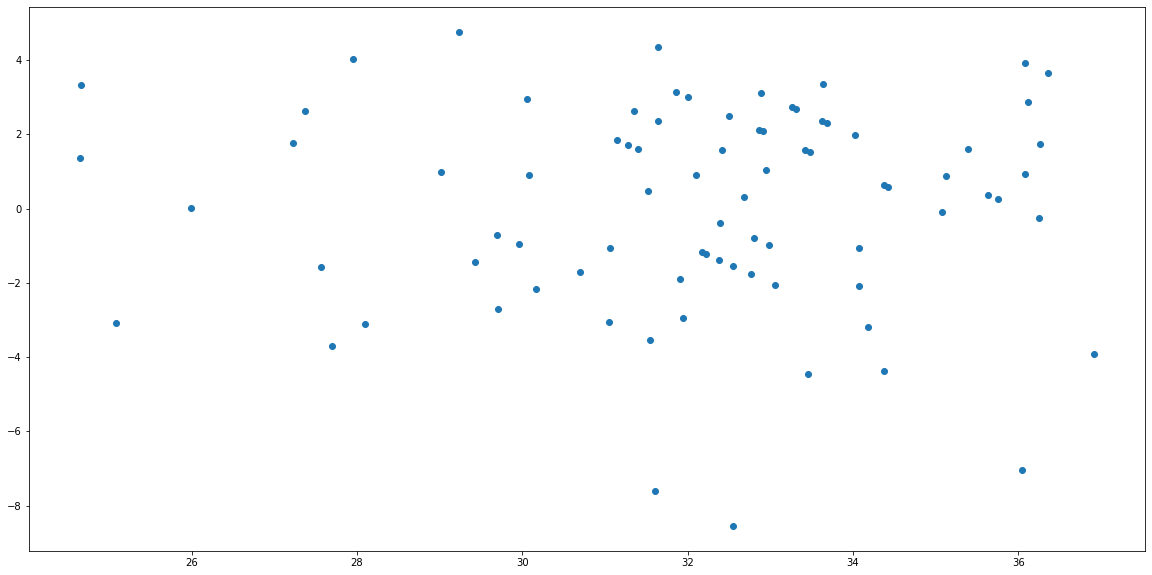

In [65]:
plt.scatter(reg_pred,residual)

### Performance Metrics 

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.50476697306243
2.2354993752323624
2.7394829755014776


### R square and adjusted R square 

In [67]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5037314185907535


### Adjusted R square 

In [68]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.43283590696086116

# Ridege Regression Algorithm 

In [69]:
from sklearn.linear_model import Ridge


In [70]:
ridge=Ridge()

In [71]:
ridge

Ridge()

In [72]:
ridge.fit(x_train,y_train)

Ridge()

In [73]:
## Coefficient

print(ridge.coef_)

[[-1.25483718 -0.53296814 -0.20702885  0.72895886 -0.60290935 -0.32591751
   0.24045074  0.93900788  0.21118476 -0.1916003 ]]


In [74]:
## Intercept

print(ridge.intercept_)

[32.17791411]


In [75]:
ridge_pred=ridge.predict(x_test)

In [76]:
ridge_pred

array([[31.35162743],
       [33.40986612],
       [33.72771064],
       [32.07338971],
       [32.90931259],
       [35.0319983 ],
       [32.79015818],
       [34.17178646],
       [31.97942736],
       [33.01801414],
       [33.36867288],
       [27.41069432],
       [35.06294721],
       [29.21943029],
       [31.86814167],
       [32.4415311 ],
       [34.32301905],
       [28.10883976],
       [36.28106232],
       [34.1156651 ],
       [32.5477257 ],
       [34.12721932],
       [32.95790766],
       [33.29642758],
       [36.10629748],
       [29.45172695],
       [31.55350828],
       [32.44406184],
       [27.6048532 ],
       [32.16940933],
       [26.0626233 ],
       [27.15902083],
       [34.09770279],
       [31.64258349],
       [32.74172122],
       [31.00145744],
       [29.02397313],
       [33.02208479],
       [27.70413671],
       [35.54562191],
       [32.78559985],
       [33.71213911],
       [34.19881056],
       [31.48850848],
       [36.06072934],
       [33

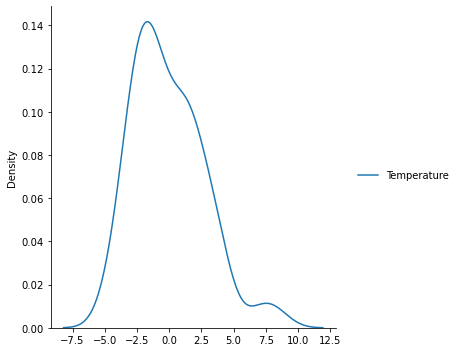

In [77]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

# Assumption on Ridge Regression 

Text(0, 0.5, 'Test predicted data')

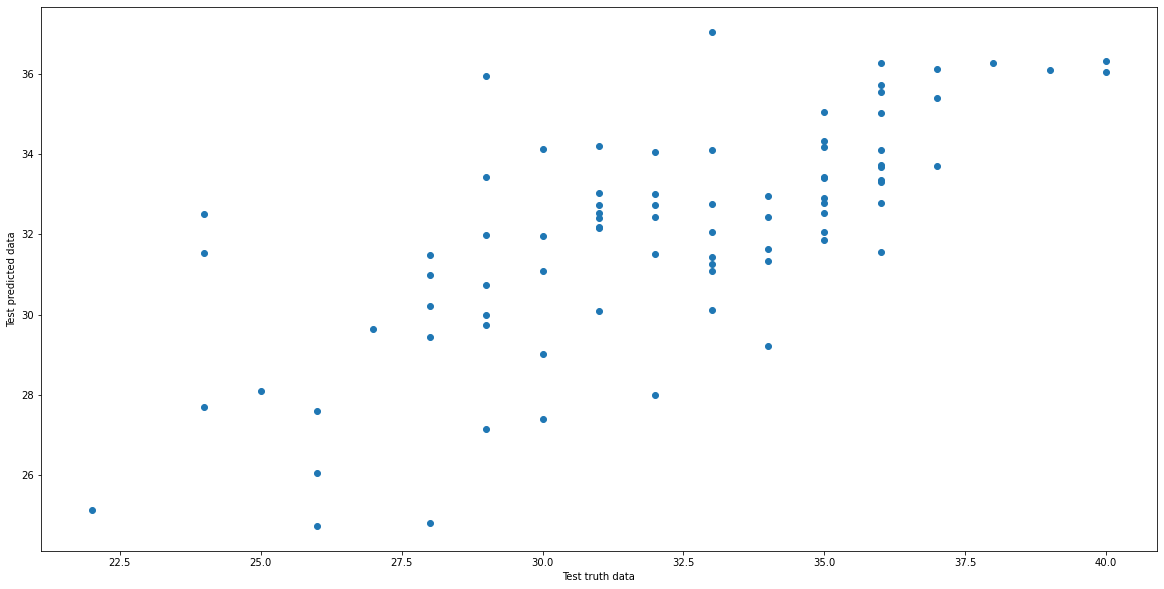

In [78]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

In [79]:
# Residual

residual=y_test-ridge_pred

In [80]:
residual

,Temperature
162,2.648373
60,1.590134
61,2.272289
63,2.926610
69,2.090687
...,...
169,0.247491
232,-6.953924
144,1.725441
208,-4.048587


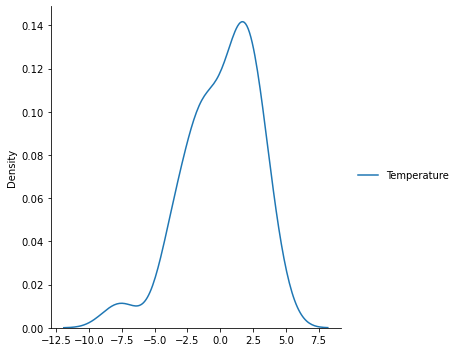

In [81]:
sns.displot(residual,kind='kde')

### Scatter plot with residual and prediction 

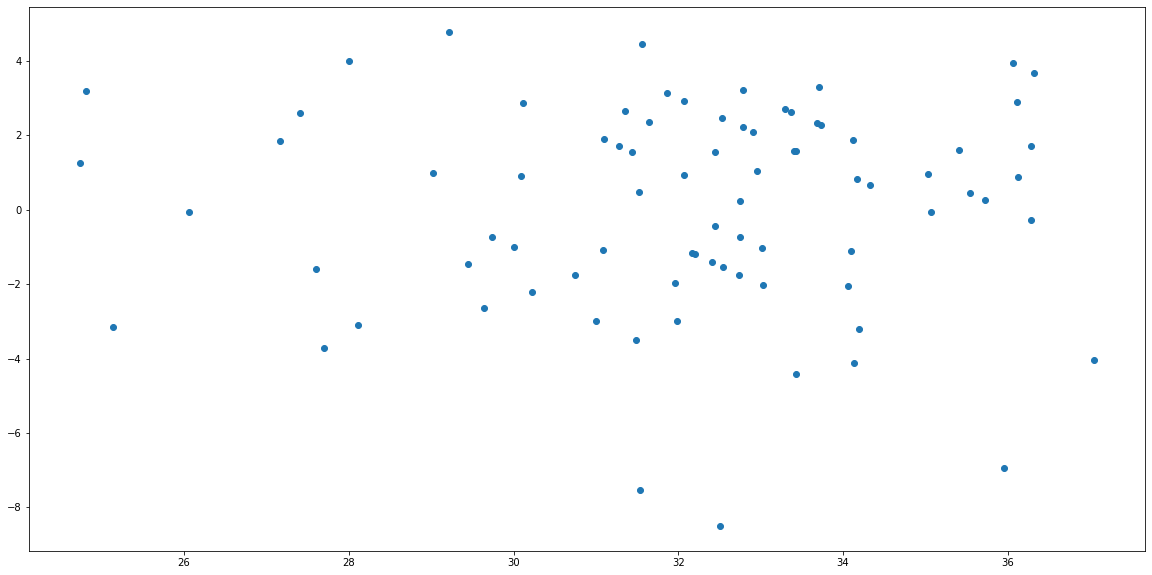

In [82]:
plt.scatter(ridge_pred,residual)

## Performance Matrics 

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.444528719288362
2.2355295943587614
2.728466367630058


### R square 

In [84]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_pred)
print(ridge_score)

0.5077148004671436


## Adjusted R square 

In [85]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4373883433910213

# Lasso Regression 

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso=Lasso()

In [88]:
lasso

Lasso()

In [89]:
lasso.fit(x_train,y_train)

Lasso()

### Coefficients and Intercepts

In [90]:
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.         -0.
  0.          0.          0.         -0.        ]


In [91]:
print(lasso.intercept_)

[32.17791411]


In [92]:
## Prediction for test data

lasso_pred = lasso.predict(x_test)

In [93]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

### Performace Matrics 

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


## R Square 

In [95]:
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_pred)
print(lasso_score)

0.39784019626969913


## Adjusted R square 

In [96]:
1-(1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.31181736716537045

#  Elastic - Net regression

In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
elastic=ElasticNet()

In [99]:
elastic

ElasticNet()

In [100]:
elastic.fit(x_train,y_train)

ElasticNet()

### Coefficients and Intercepts 

In [101]:
print(elastic.coef_)

[-0.69396083 -0.10315403 -0.01507374  0.6926462   0.10752205 -0.
  0.28392506  0.07544656  0.05920494 -0.        ]


In [102]:
print(elastic.intercept_)

[32.17791411]


In [103]:
## Prediction for test data
elastic_pred = elastic.predict(x_test)

In [104]:
elastic_pred

array([31.93076461, 32.89925279, 32.68965549, 31.74550697, 32.98836724,
       33.91299333, 33.41776043, 32.72078781, 31.98790062, 32.72490467,
       33.30044153, 29.87165926, 34.12217082, 30.65936304, 32.72255437,
       32.28333638, 32.84852051, 29.39040946, 35.0786389 , 33.86050655,
       32.42586731, 33.31820617, 33.43805315, 32.91463826, 35.09348452,
       29.99111145, 32.16696212, 32.5466324 , 29.35144729, 31.97557447,
       29.14216505, 28.60375228, 33.27376701, 32.28678221, 32.70561446,
       31.30843328, 30.01197805, 32.32347658, 29.15902087, 33.91042464,
       32.74766721, 33.47903767, 34.12940549, 31.56461381, 34.44958031,
       33.30036678, 29.35558024, 33.99794233, 33.3293338 , 30.2978916 ,
       31.4241864 , 32.36311525, 34.61701506, 32.03023331, 31.41948172,
       30.89419347, 32.508051  , 34.7691147 , 31.73370163, 33.3687946 ,
       32.1509131 , 32.34603101, 31.21296836, 28.90195873, 31.96458545,
       34.79046967, 30.91855019, 31.0841594 , 33.82121587, 32.95

# Assumption of Elastic Net Regression

Text(0, 0.5, 'Test predicted data')

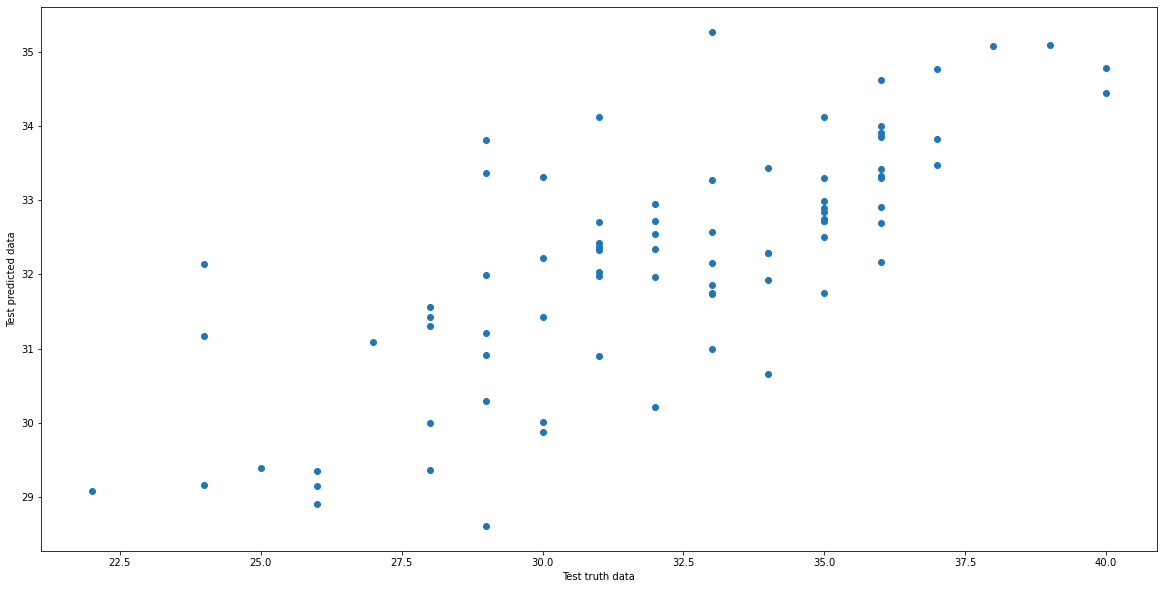

In [105]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

## Performance Matrix

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

8.346007590926808
2.3987645425349116
2.8889457576989583


### R square

In [107]:
from sklearn.metrics import r2_score
elastic_score=r2_score(y_test,elastic_pred)
print(elastic_score)

0.4481026043251144


### Adjusted R square 

In [108]:
1-(1-elastic_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.36926011922870217